**Brian Blaylock**  
*December 18, 2020*

# 🌎 ABI Geostationary **field-of-view** in Cartopy

- [GOES-R Series Data Book](https://www.goes-r.gov/downloads/resources/documents/GOES-RSeriesDataBook.pdf)
    - Full Disk Coverage: Defined as a 17.4 degree diameter circle (pg 48)


In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

from goes2go.data import goes_latest, goes_nearesttime
from goes2go.tools import field_of_view

from BB_maps.add_to_cartopy import common_features, pc

In [2]:
# Testing Phase
gcentral = goes_nearesttime(datetime(2017,10,5), satellite='G16', product='ABI')

# GOES East
g16 = goes_latest(satellite='G16', product='ABI')

# GOES West
g17 = goes_latest(satellite='G17', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Get the data's coordinate reference system and field of view with the `goes2go.tools.field_of_view` function
This returns both the field of view as a shapely polygon and the cartopy coordinate reference system.

In [49]:
FOV_16, geo16 = field_of_view(g16)
geo16

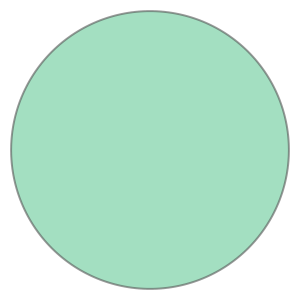

In [51]:
FOV_16   # See, the FOV is just a shapely polygon

In [4]:
FOV_17, geo17 = field_of_view(g17)
geo17

In [5]:
FOV_central, geocentral = field_of_view(gcentral)
geocentral

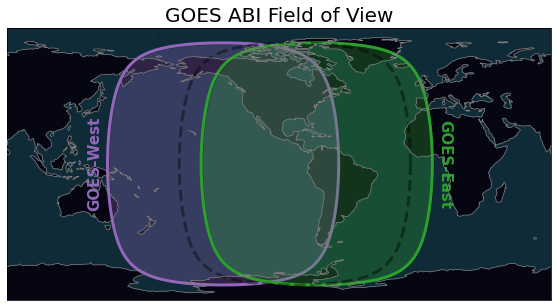

In [63]:
ax = common_features(OCEAN=True, LAND=True, projection=ccrs.PlateCarree(central_longitude=-100), figsize=[10,5], dark_theme=True)

# I have to use the buffer to reduce the geo boundary because cartopy doesn't
# draw an exact boundary. For this visualization purpose, this is OK.

# Draw boundary of GOES17
ax.add_geometries([FOV_17], crs=geo17,
                   facecolor='tab:purple', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([FOV_17], crs=geo17,
                   facecolor='none', edgecolor='tab:purple', alpha=1, linewidth=3)

# Draw boundary of GOES16
ax.add_geometries([FOV_16], crs=geo16,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([FOV_16], crs=geo16,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3)

# Draw boundary of GOES-Central (test phase)
ax.add_geometries([FOV_central], crs=geocentral,
                   facecolor='none', edgecolor='k', alpha=.4, linewidth=3, linestyle='--')


ax.text(g17.geospatial_lat_lon_extent.geospatial_lon_nadir-90,
        g17.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-West', transform=pc,
       rotation=90, va='center', fontsize=15, color='tab:purple', fontweight='bold')

ax.text(g16.geospatial_lat_lon_extent.geospatial_lon_nadir+80,
        g16.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-East', transform=pc,
       rotation=-90, va='center', fontsize=15, color='tab:green', fontweight='bold')

plt.title('GOES ABI Field of View', fontsize=20)

plt.savefig('../images/ABI_field-of-view.png')